In this program, we use the OpenCV library (cv2) to perform edge detection using Sobel masks.

The edge_detection_sobel() function takes an input image and performs the following steps:

1. Convert the image to grayscale using cv2.cvtColor().
2. Apply Gaussian blur to reduce noise using cv2.GaussianBlur().
3. Apply the Sobel filters using cv2.Sobel(). We compute the gradients in the x and y directions separately.
4. Compute the gradient magnitude using np.sqrt() and the gradient direction using np.arctan2().
5. Normalize the gradient magnitude using cv2.normalize() to scale the values between 0 and 255.
6. Threshold the gradient magnitude using cv2.threshold() to obtain the edges.
7. Return the resulting edge-detected image.

In the main part of the program, we load the input image using cv2.imread() and call the edge_detection_sobel() function to obtain the edge-detected image. Finally, we display the original and edge-detected images using cv2.imshow() and wait for a key press to close the windows.

Note: Make sure you have the OpenCV (opencv-python) library installed in your Python environment before running this code. You can install it using pip install opencv-python.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def edge_detection_sobel(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Apply Sobel filters
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the gradient magnitude and direction
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_direction = np.arctan2(sobel_y, sobel_x)
    
    # Normalize the gradient magnitude
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    
    # Threshold the gradient magnitude to obtain edges
    _, edges = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)
    
    return sobel_x, sobel_y, gradient_magnitude, gradient_direction, edges

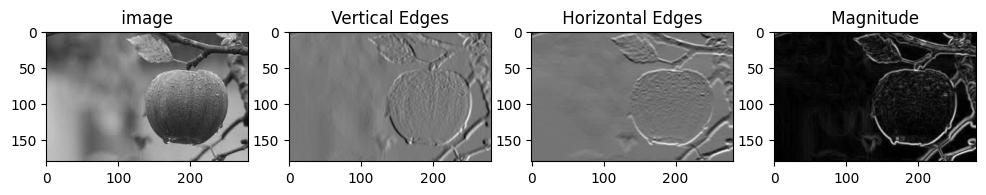

In [2]:
# Load the image
image = cv2.imread('real_image.png')

# Perform edge detection using Sobel masks
sobel_x, sobel_y, gradient_magnitude, gradient_direction, edges = edge_detection_sobel(image)

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
fig.add_subplot(141)
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(image)

fig.add_subplot(142)
plt.title(' Vertical Edges ')
plt.set_cmap('gray')
plt.imshow(sobel_x)

fig.add_subplot(143)
plt.title(' Horizontal Edges ')
plt.set_cmap('gray')
plt.imshow(sobel_y)

fig.add_subplot(144)
plt.title(' Magnitude ')
plt.set_cmap('gray')
plt.imshow(gradient_magnitude)

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(111)
plt.title(' Magnitude ')
plt.set_cmap('gray')
plt.imshow(gradient_magnitude)

fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
# fig.add_subplot(141)
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(gradient_direction)